# TYPES OF NOISE 

### White noise, pink noise, and brown noise in the time and frequency domains

More info here: https://en.wikipedia.org/wiki/Colors_of_noise

Types of noise are based on the power law:

power spectral density per unit of bandwidth proportional to 1/f β 

where:

β = 0 for white noise

β = 1 for pink noise

β = 2 for brown noise
       

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# WHITE NOISE

White noise has a flat power spectrum. All frequencies present in the signal have equal power (in theory). Therefore, the slope of the spectrum is 0, aka flat. Power law relationship = 1/f^(0)

Here, I generated white noise using numpy.random.

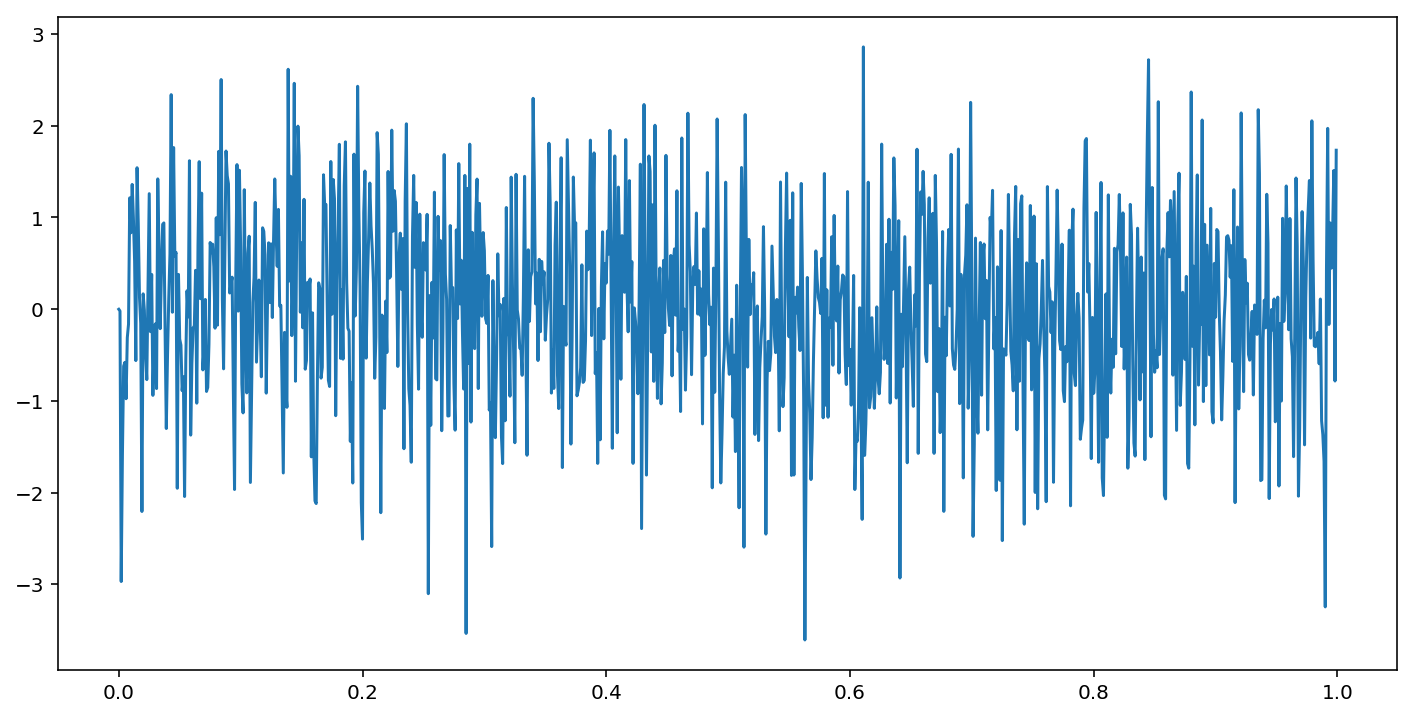

In [2]:
#Generate white noise time series 
mean = 0
std = 1 
num_samples = 1000000 #length of time series
fs = 1000 #sampling rate 1000Hz
white_noise_data = np.random.normal(mean, std, size=num_samples) #generate white (random) noise
t = np.arange(len(white_noise_data))/fs #time scale = number of samples / sampling rate

#plot 1 second of white noise data
plt.figure(figsize=[12,6])
plt.plot(t[0:1000], white_noise_data[0:1000]) #plot samples over time

/Users/sydneysmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0.5,1,'FFT of White Noise')

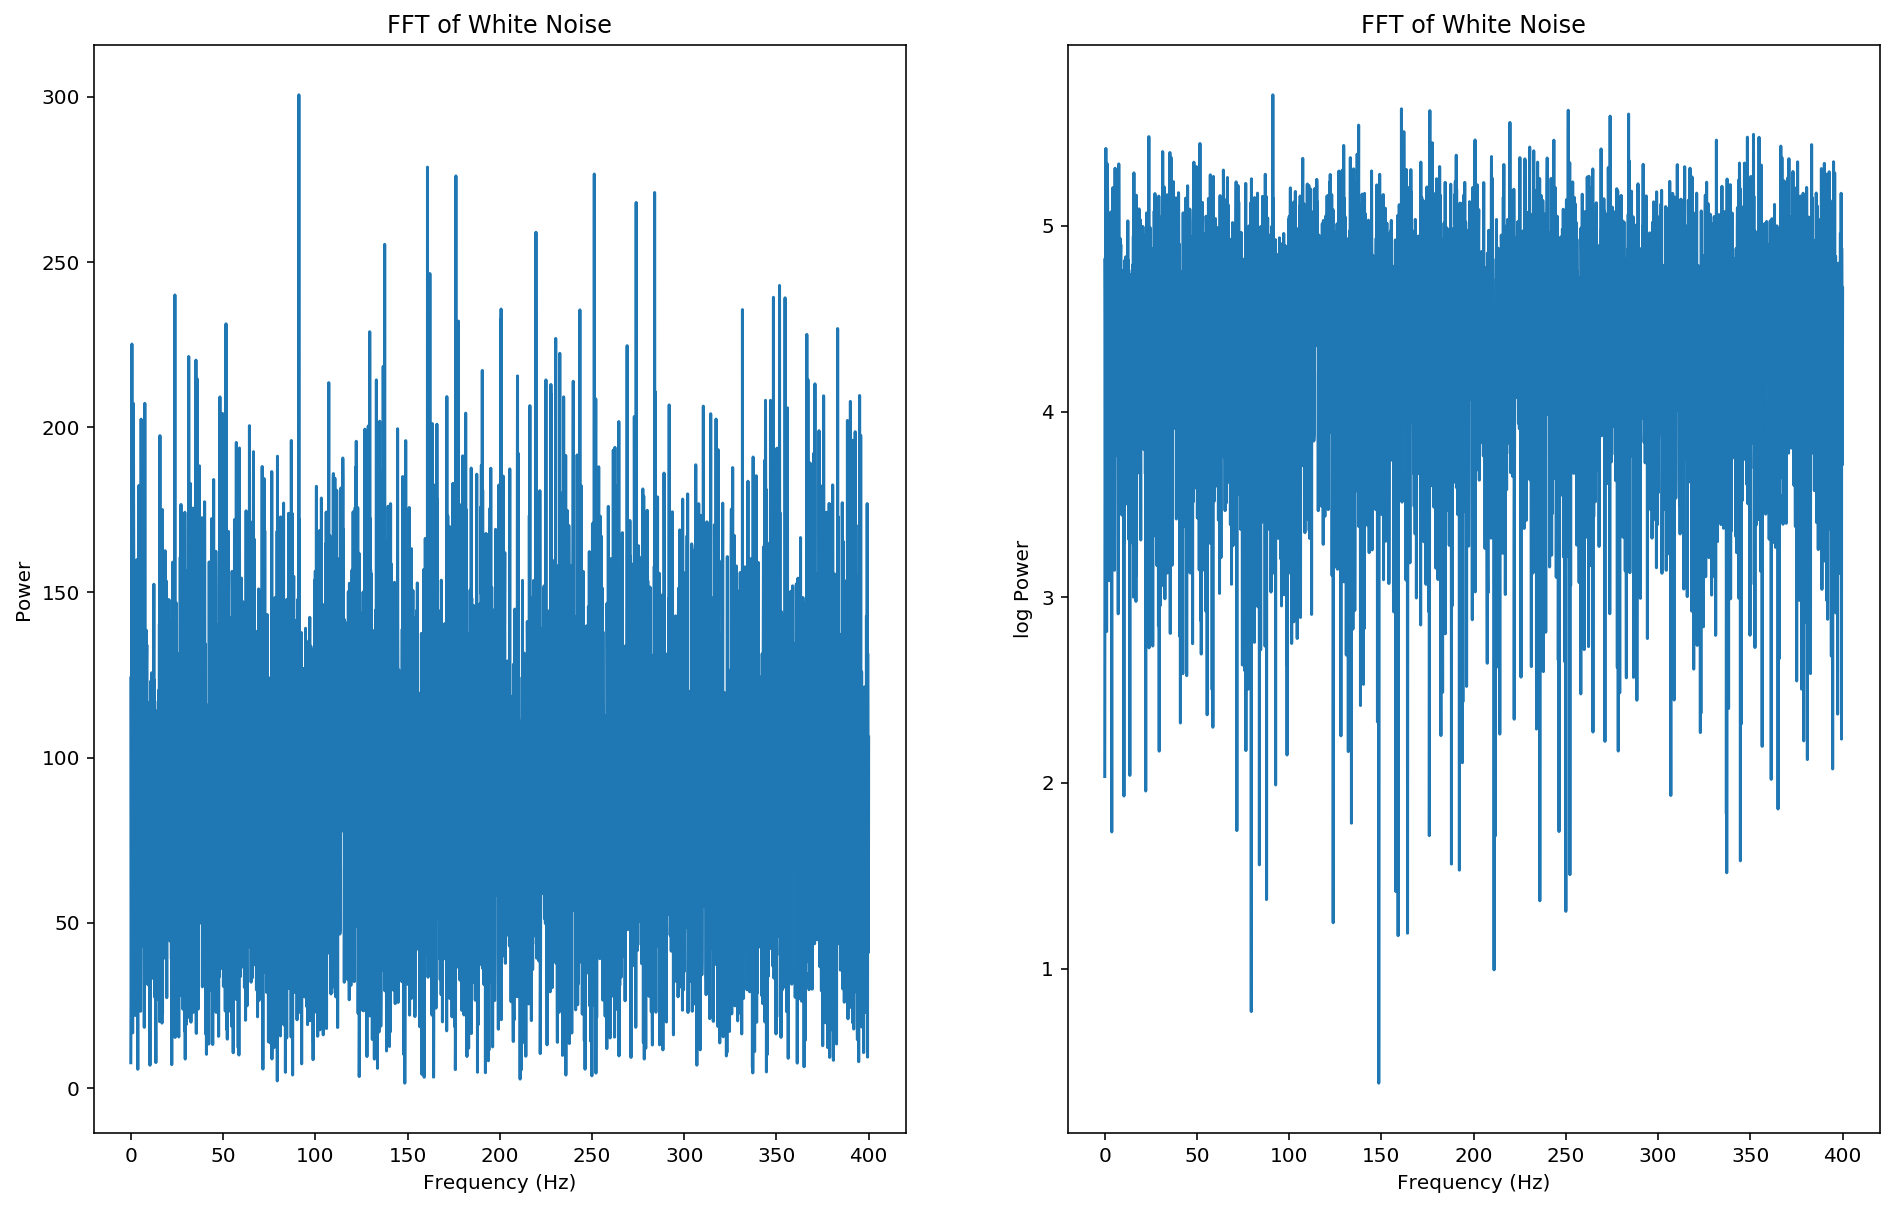

In [3]:
# calculating fourier transform of complex signal
# we're going to take a sample of the data to keep fx bins at a reasonable size.
fourier = np.fft.fft(white_noise_data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = fs/len(white_noise_data[0:10000])
nyq = .5*fs
total_steps = nyq/fx_step_size
fx_bins = np.linspace(0,nyq,total_steps)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fx_bins[0:4000],abs(fourier[0:4000])) #any frequencies above 200 Hz are probably noise
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of White Noise')

#Same thing but in log space
plt.subplot(1,2,2)
plt.plot(fx_bins[0:4000],np.log(abs(fourier[0:4000]))) #any frequencies above 200 Hz are probably noise
plt.ylabel('log Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of White Noise')

/Users/sydneysmith/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Text(0.5,1,"Welch's PSD of ECoG signal")

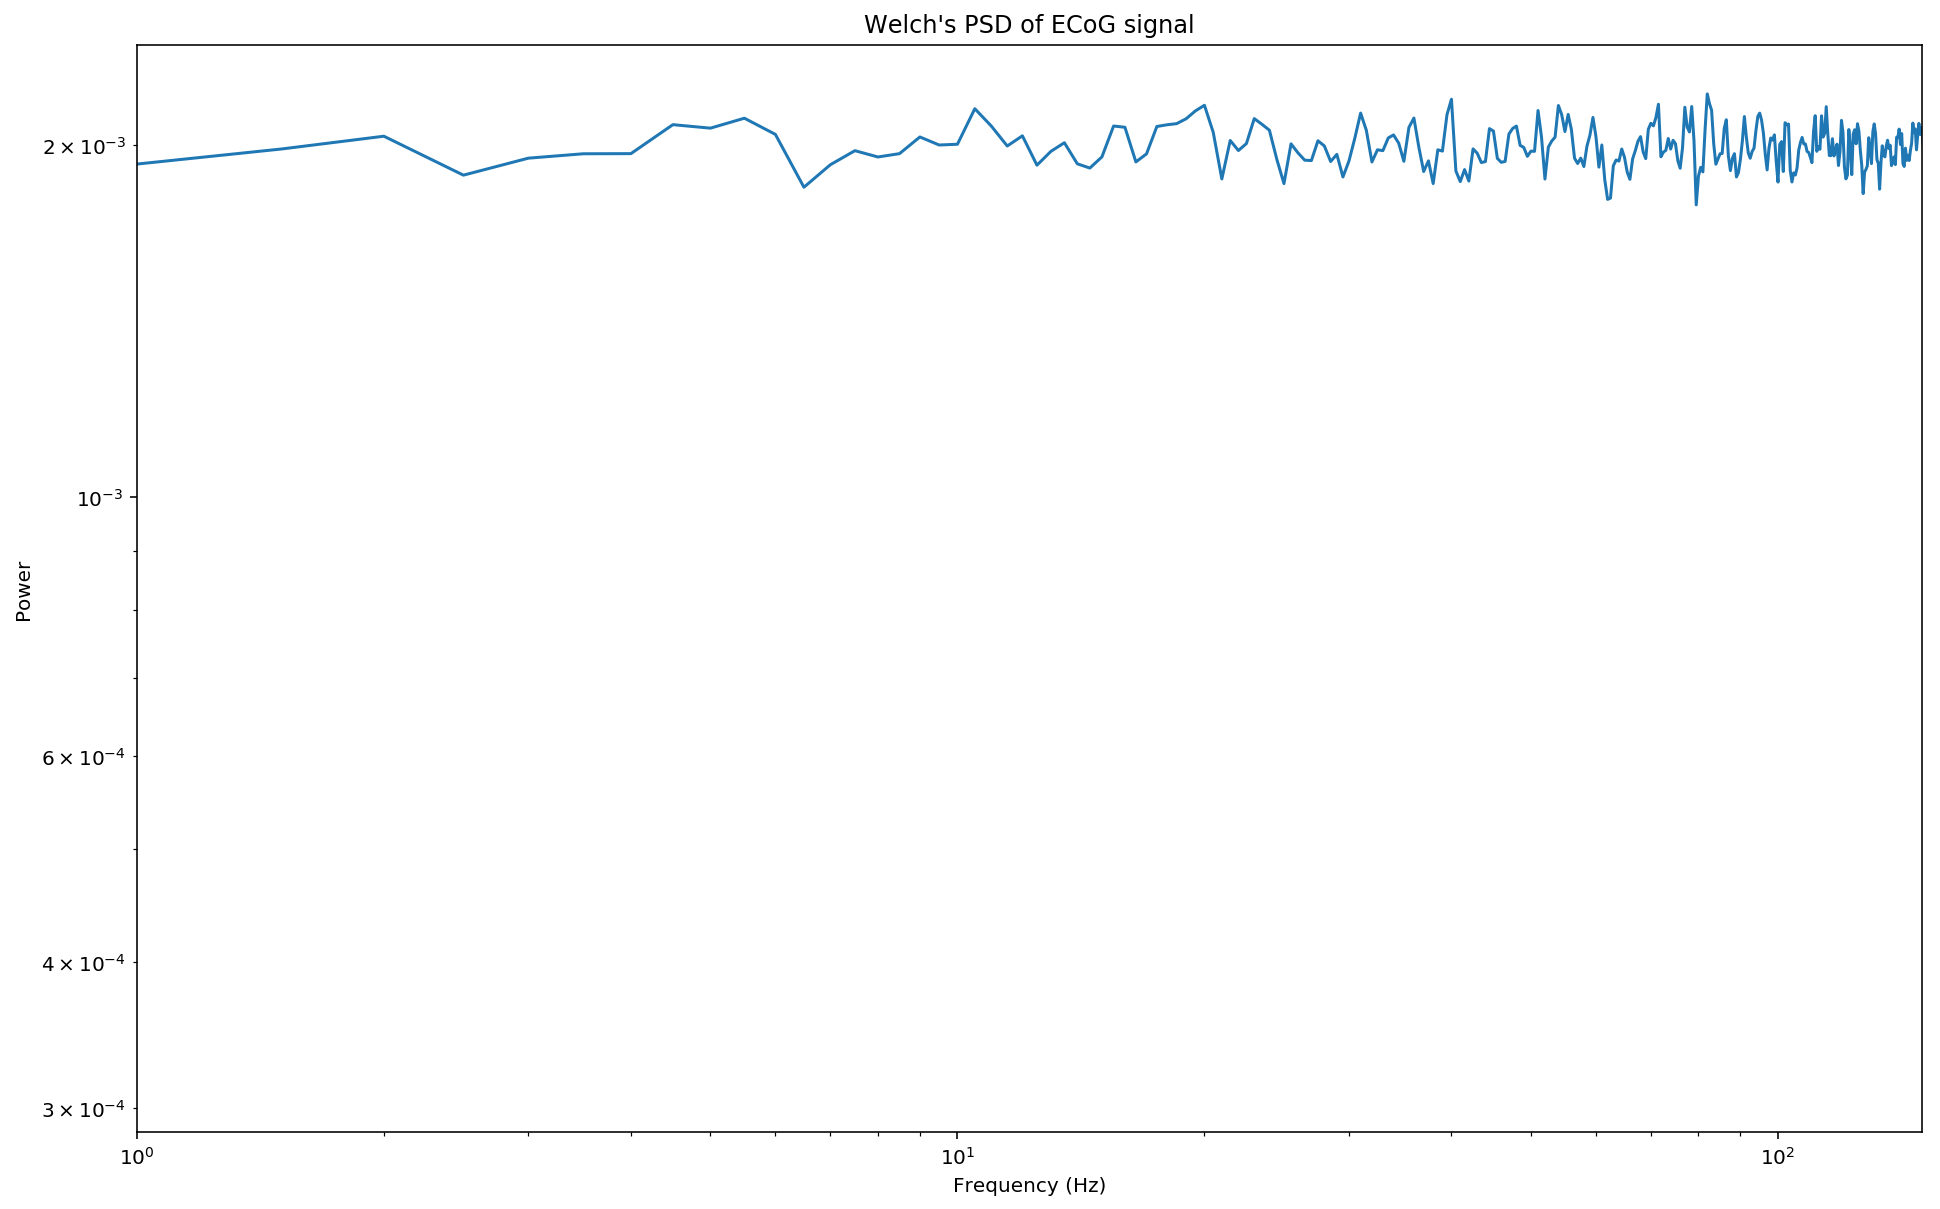

In [4]:
#Welch's PSD of white noise
f,pspec = sp.signal.welch(white_noise_data, fs=fs, window='hanning', nperseg=2*fs, noverlap=fs/2, nfft=None, detrend='linear', return_onesided=True, scaling='density')

plt.figure(figsize=(16,10))
plt.loglog(f[0:200*2],pspec[0:200*2])
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.xlim([1, 150])
plt.title("Welch's PSD of ECoG signal")

# PINK NOISE

Pink noise has a 1/f^(1) Power Law relationship, a diagonal slope.

Here I generate pink noise using a function I found here: https://www.dsprelated.com/showarticle/908.php

In [5]:
#Function to generate time series with properties of pink noise
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

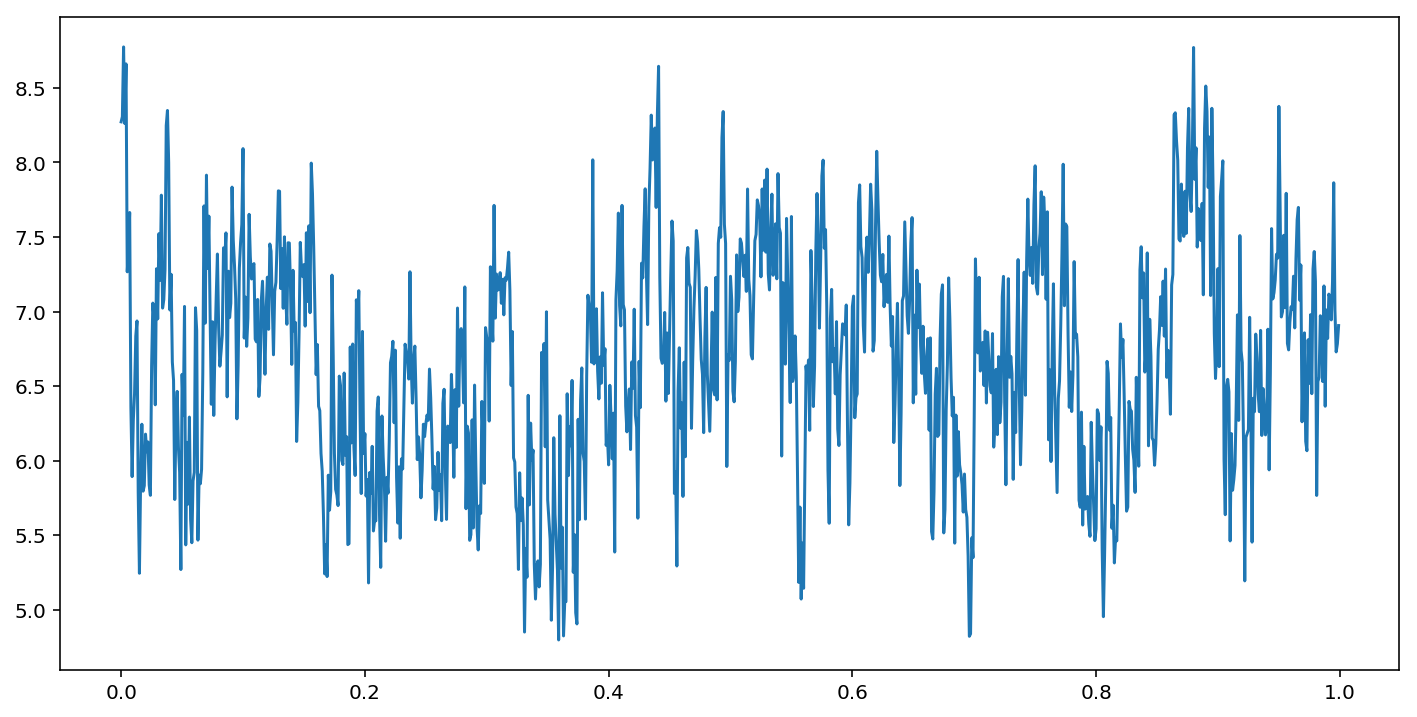

In [6]:
pink_data = voss(1000000)
fs = 1000
t = np.arange(len(pink_data))/fs

#plot 1 second of pink noise data
plt.figure(figsize=[12,6])
plt.plot(t[0:1000], pink_data[0:1000]) #plot samples over time

/Users/sydneysmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0.5,1,'FFT of Pink Noise')

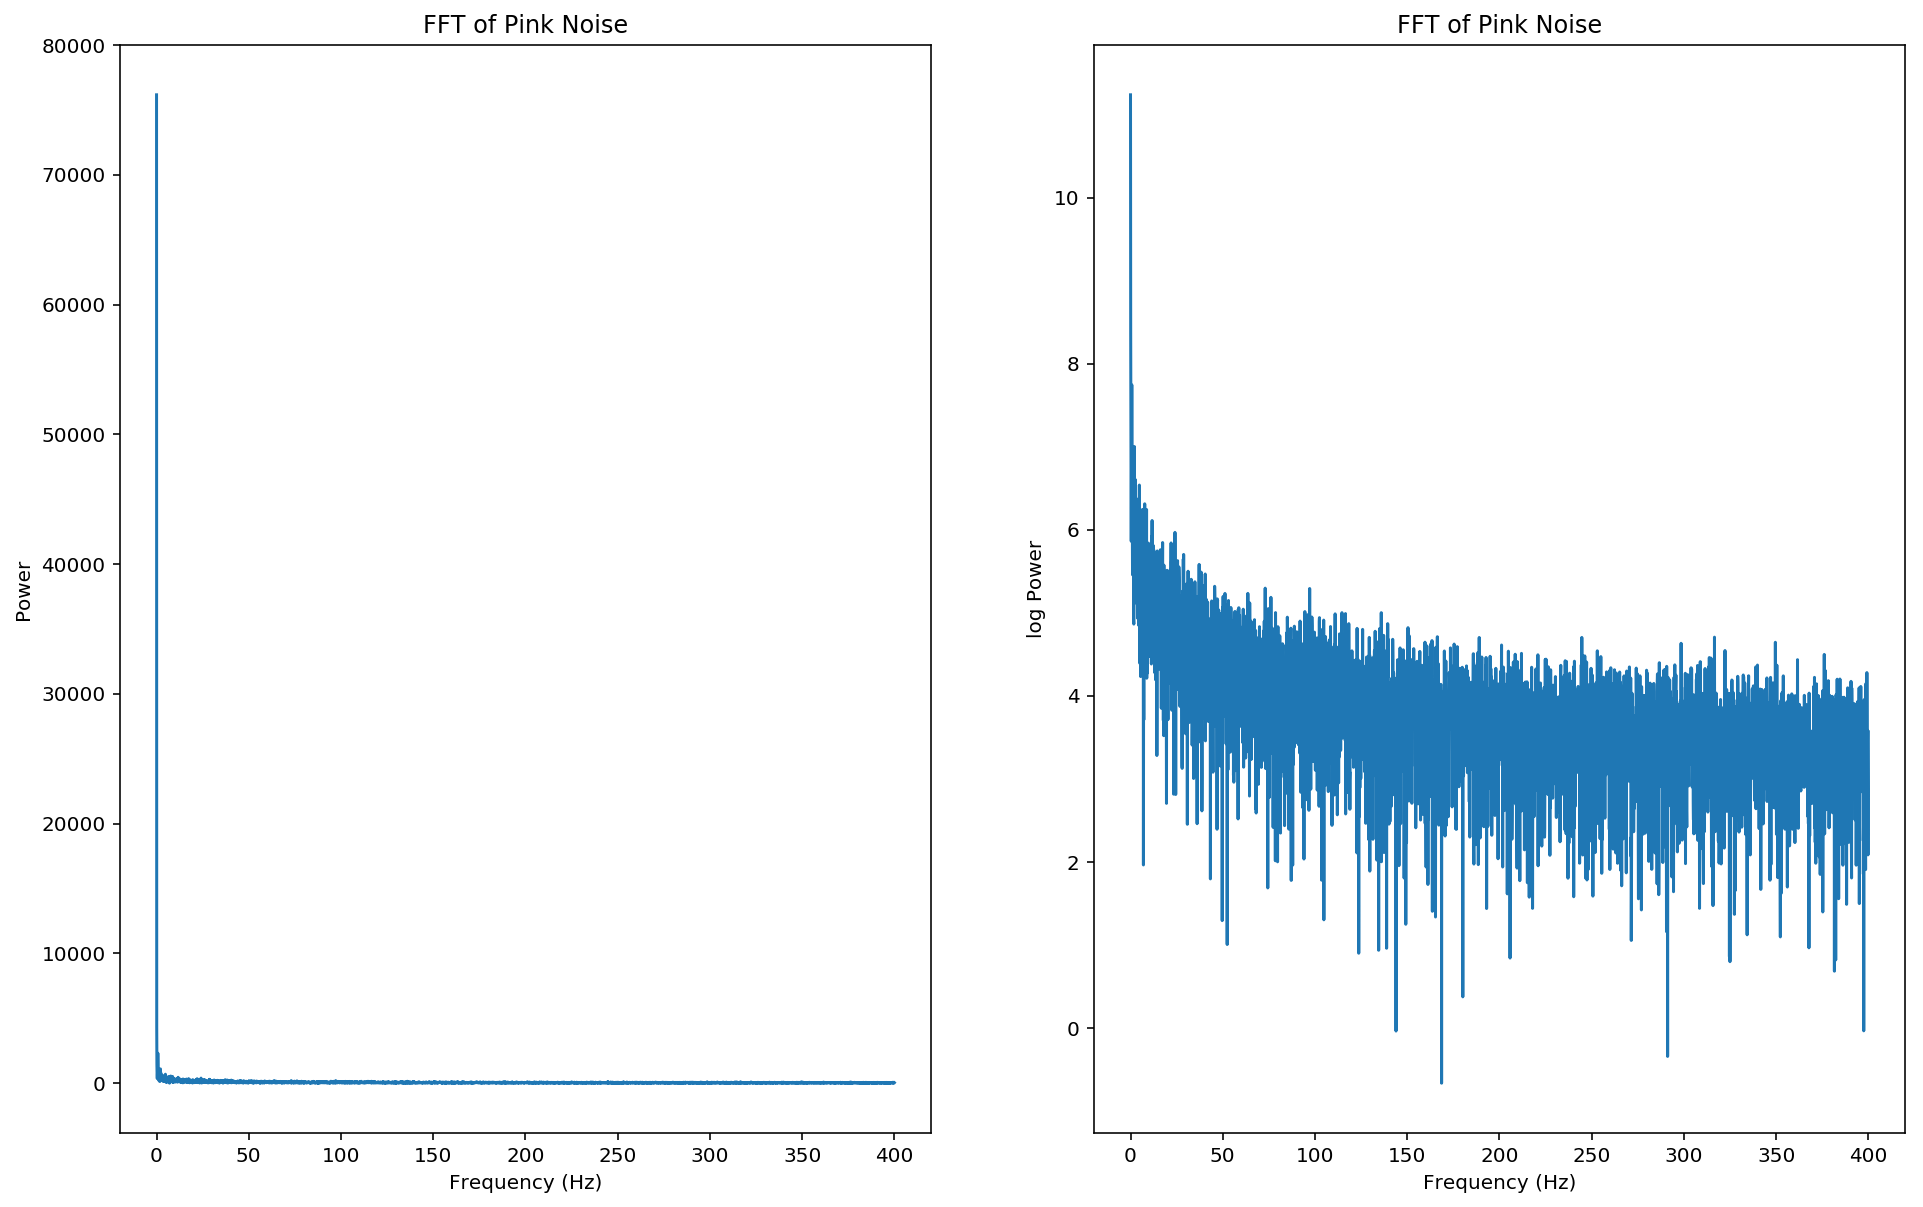

In [7]:
# calculating fourier transform of complex signal
# we're going to take a sample of the data to keep fx bins at a reasonable size.
fourier = np.fft.fft(pink_data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = fs/len(pink_data[0:10000])
nyq = .5*fs
total_steps = nyq/fx_step_size
fx_bins = np.linspace(0,nyq,total_steps)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fx_bins[0:4000],abs(fourier[0:4000])) 
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Pink Noise')

#same thing but in log space
plt.subplot(1,2,2)
plt.plot(fx_bins[0:4000],np.log(abs(fourier[0:4000]))) 
plt.ylabel('log Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Pink Noise')

Text(0.5,1,"Welch's PSD of Pink Noise")

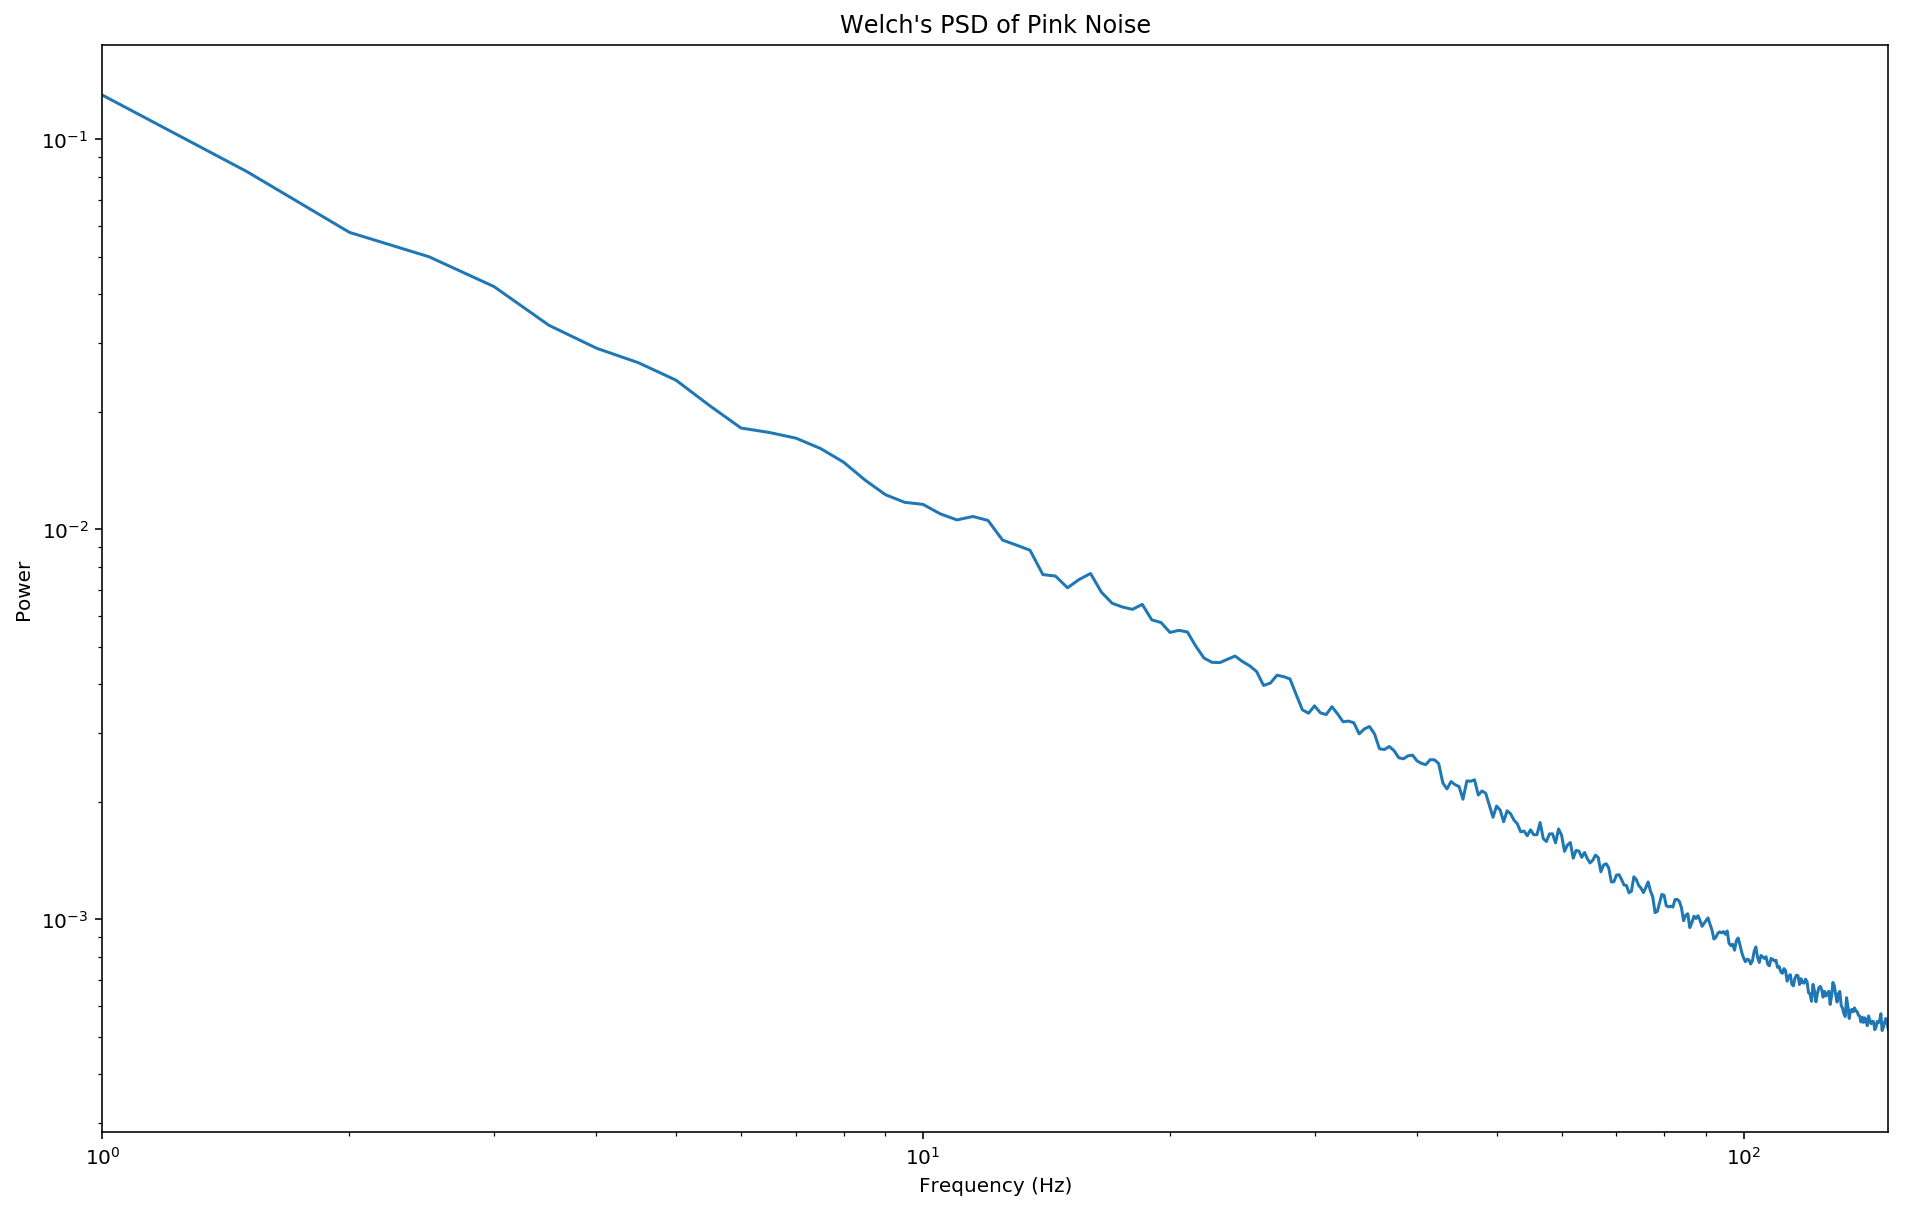

In [8]:
#Welch's PSD of pink noise
f,pspec = sp.signal.welch(pink_data, fs=fs, window='hanning', nperseg=2*fs, noverlap=fs/2, nfft=None, detrend='linear', return_onesided=True, scaling='density')

plt.figure(figsize=(16,10))
plt.loglog(f[0:200*2],pspec[0:200*2])
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.xlim([1, 150])
plt.title("Welch's PSD of Pink Noise")

# BROWN NOISE (BROWNIAN MOTION)

Brown noise (or Brownian motion) has a 1/f^(2) relationship. The slope of the spectrum is steeper than that of pink noise.

Here I generated Brown noise using a function I found here: https://github.com/python-acoustics/python-acoustics/blob/master/acoustics/generator.py

Brown noise is also called red noise.

In [9]:
#Function to generate time series with properties of brown noise
def brown(N, state=None):
    """
    Violet noise.
    :param N: Amount of samples.
    :param state: State of PRNG.
    :type state: :class:`np.random.RandomState`
    Power decreases with -3 dB per octave.
    Power density decreases with 6 dB per octave.
    """
    state = np.random.RandomState() if state is None else state
    uneven = N%2
    X = state.randn(N//2+1+uneven) + 1j * state.randn(N//2+1+uneven)
    S = (np.arange(len(X))+1)# Filter
    y = (irfft(X/S)).real
    if uneven:
        y = y[:-1]
    return normalize(y,1)

In [10]:
#imports to make the above function work
from numpy.fft import irfft
from scipy.signal import normalize
normalized_arrays = brown(1000000)

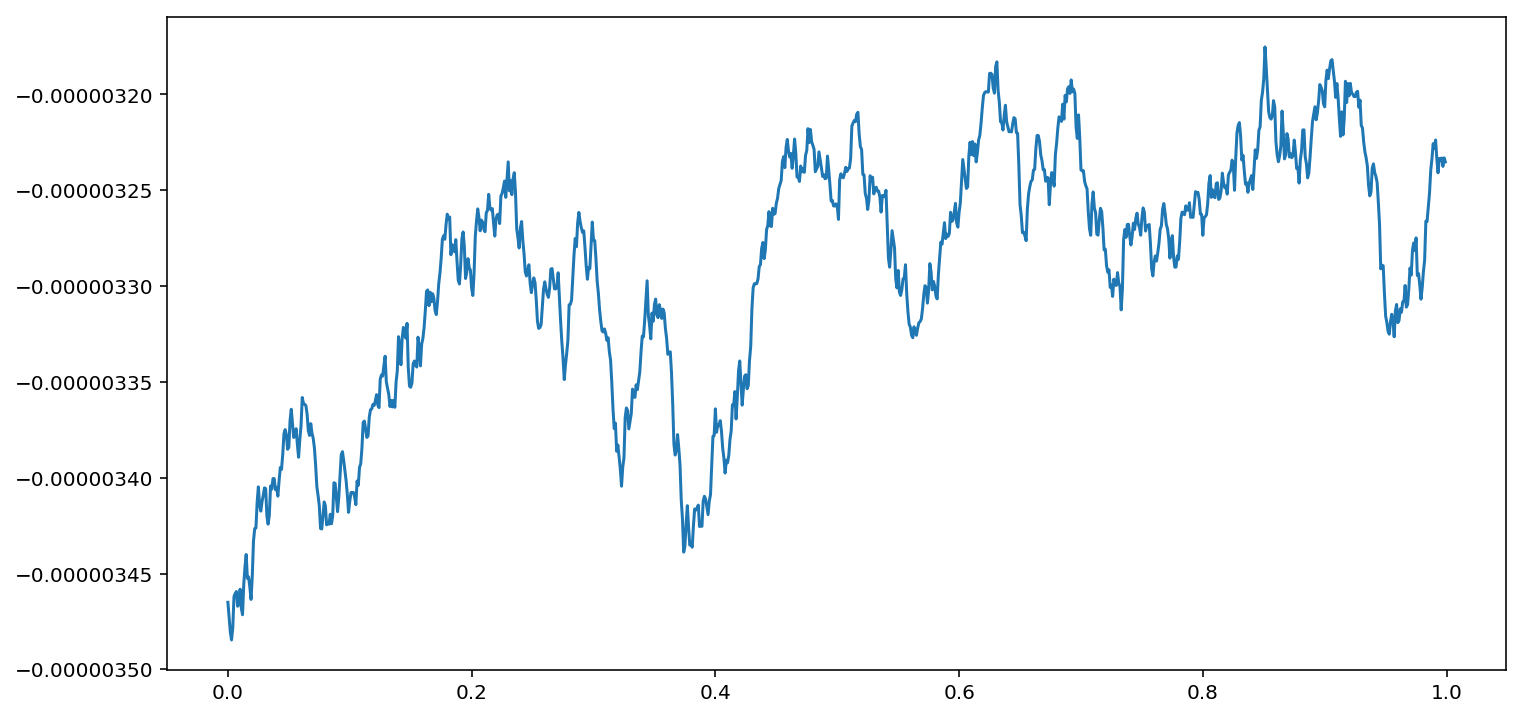

In [11]:
#get brown noise data as time series
brown_data= normalized_arrays[0]
fs = 1000
t = np.arange(len(brown_data))/fs

#plot 1 second of pink noise data
plt.figure(figsize=[12,6])
plt.plot(t[0:1000], brown_data[0:1000]) #plot samples over time

/Users/sydneysmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0.5,1,'FFT of Brown Noise')

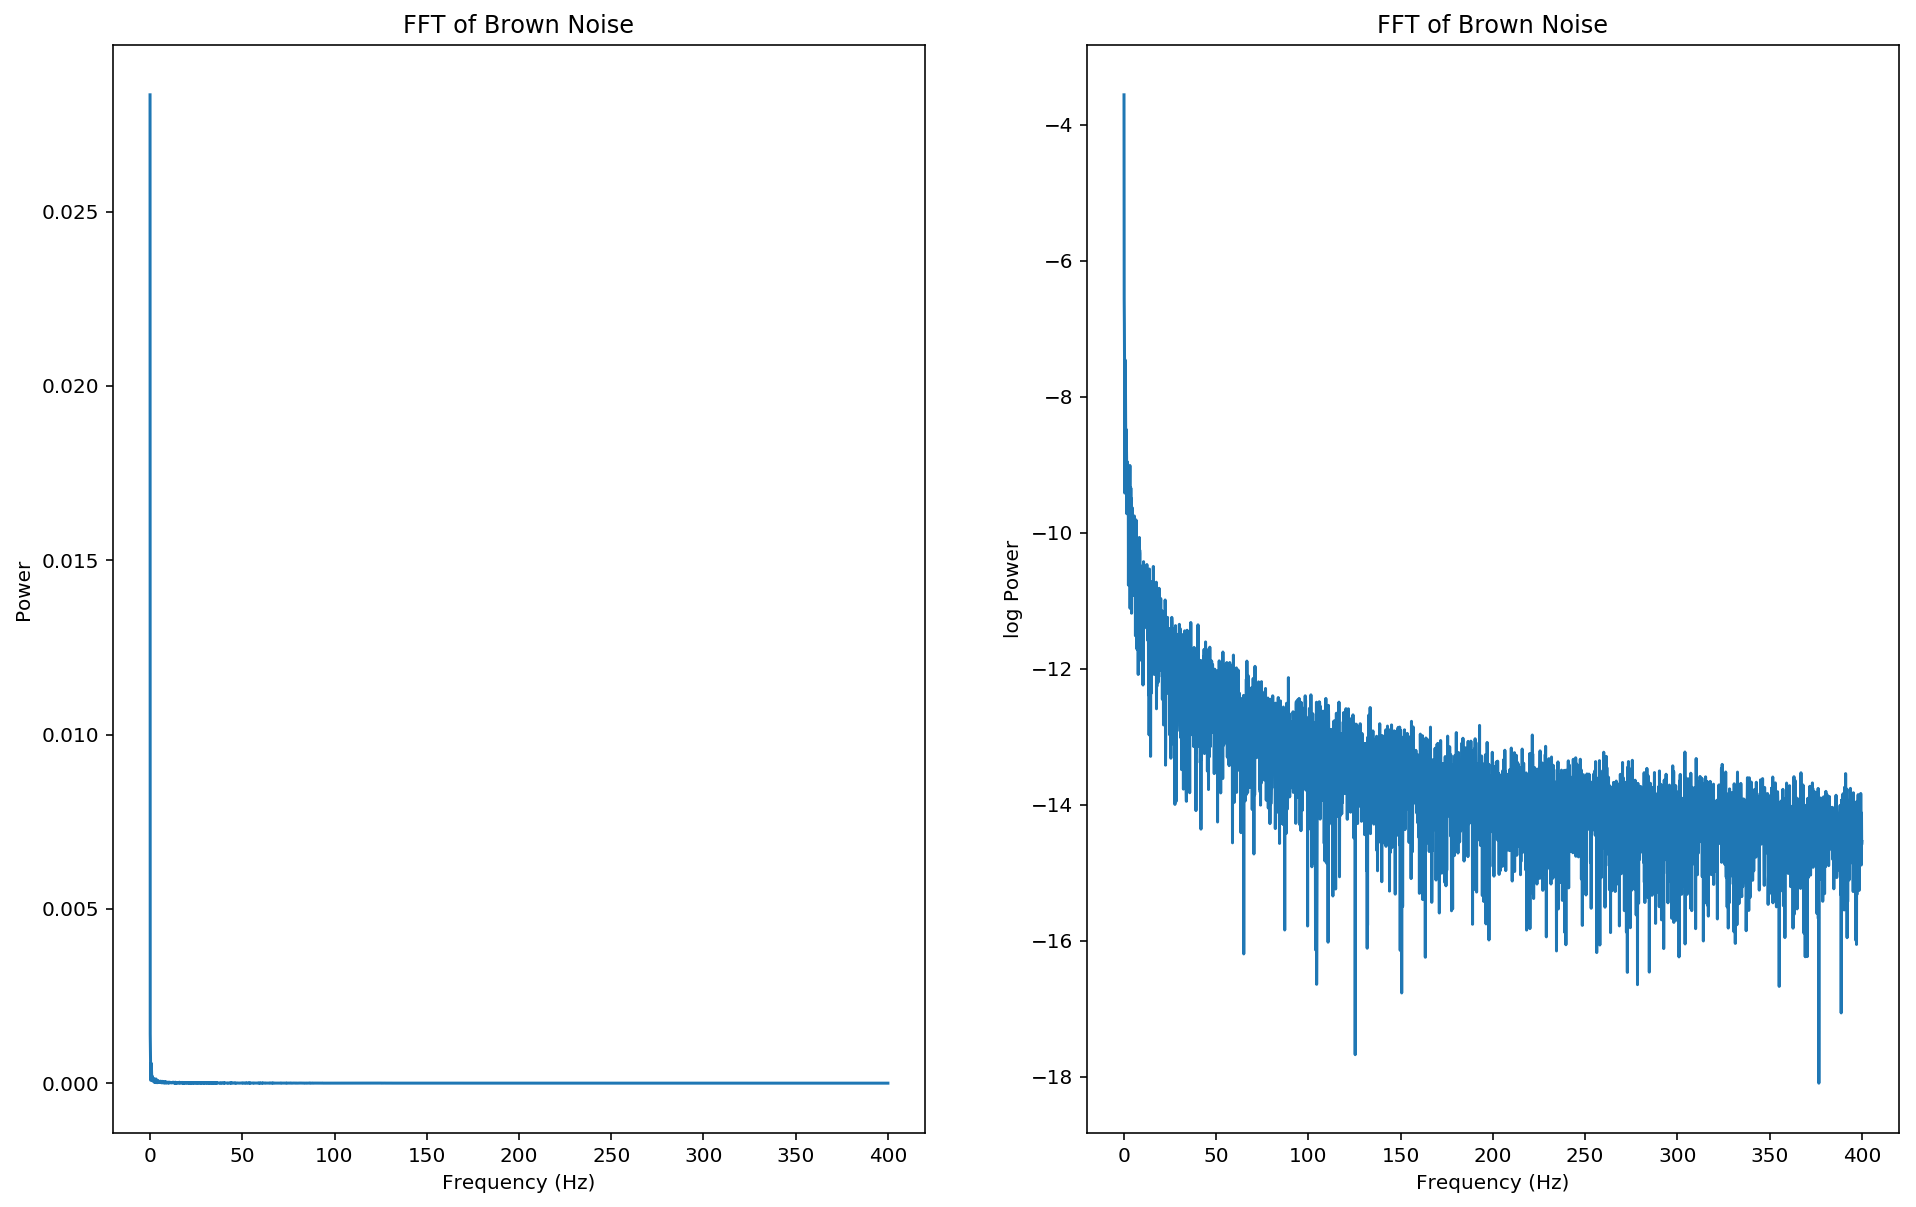

In [12]:
# calculating fourier transform of complex signal
# we're going to take a sample of the data to keep fx bins at a reasonable size.
fourier = np.fft.fft(brown_data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = fs/len(brown_data[0:10000])
nyq = .5*fs
total_steps = nyq/fx_step_size
fx_bins = np.linspace(0,nyq,total_steps)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fx_bins[0:4000],abs(fourier[0:4000])) #any frequencies above 200 Hz are probably noise
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Brown Noise')

plt.subplot(1,2,2)
plt.plot(fx_bins[0:4000],np.log(abs(fourier[0:4000]))) #any frequencies above 200 Hz are probably noise
plt.ylabel('log Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Brown Noise')

Text(0.5,1,"Welch's PSD of Brown Noise")

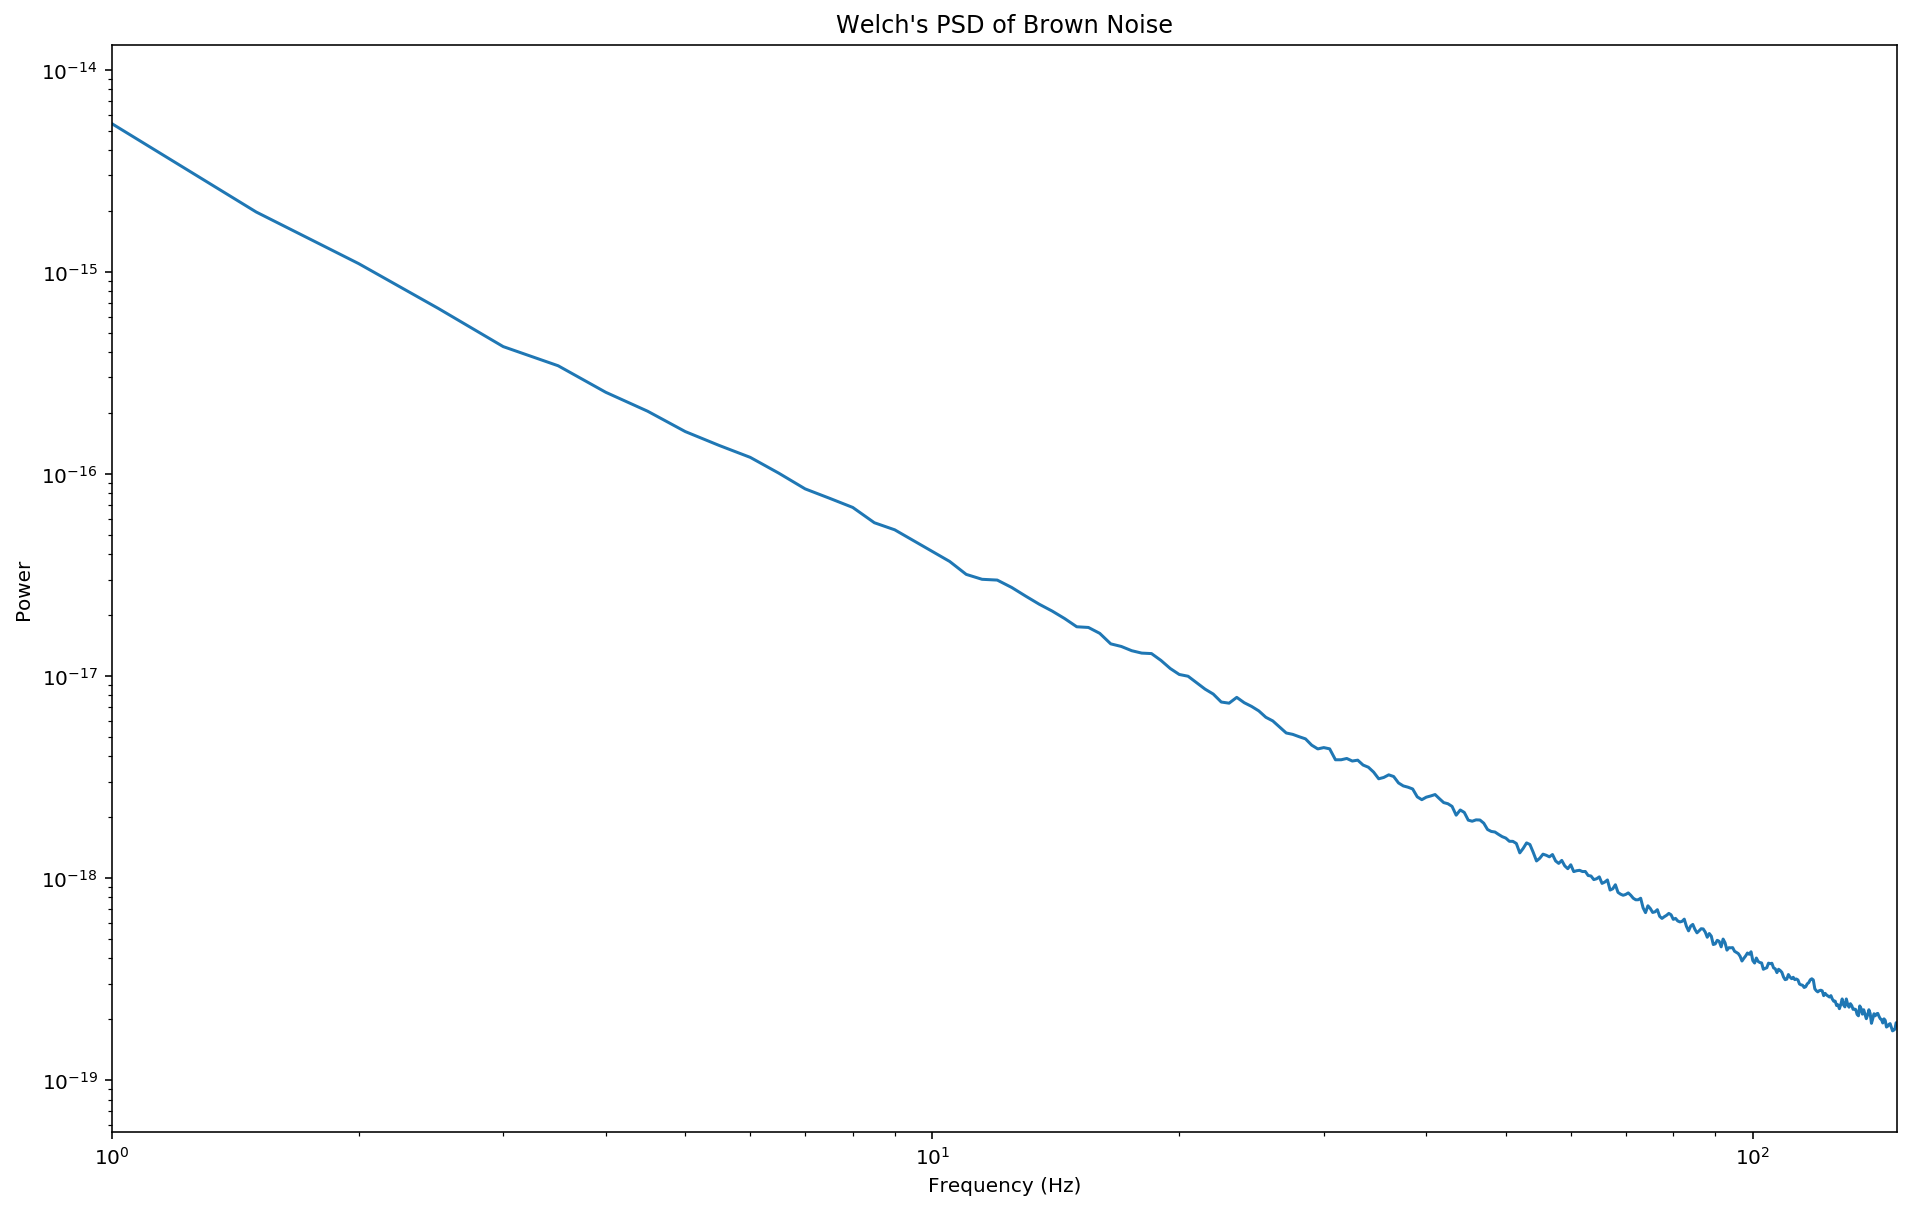

In [13]:
#Welch's PSD of white noise
f,pspec = sp.signal.welch(brown_data, fs=fs, window='hanning', nperseg=2*fs, noverlap=fs/2, nfft=None, detrend='linear', return_onesided=True, scaling='density')

plt.figure(figsize=(16,10))
plt.loglog(f[0:200*2],pspec[0:200*2])
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.xlim([1, 150])
plt.title("Welch's PSD of Brown Noise")